In [1]:
#This data is taken from https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-national-level-data

import numpy as np
import matplotlib.pyplot as plt
import re

#Define our dict to store all the years of data (Not sure if the added )
dataDict = {'Year' : [], 'Names' : [] , 'Genders' : [], 'Counts' : []}

#Set location to find data
path = 'C:\\Users\\jacob\\Desktop\\research\\names\\'

#We need to get data from a bunch of differnt files and save it to our dict
y = 1880 #the first year
while y < 2018:
    #Import data as string from file
    list_ = open(path+"yob"+str(y)+".txt").read()
    #Split data into long 1D array
    data = re.split('\n|,',list_)
    #Oranize the data to be more usable (we dont care about sex here, so drop that column)
    i = 0
    names = []
    genders = []
    counts = []
    while i < len(data):
        if i % 3 == 0 and data[i] != '':
            names.append(data[i])
        elif (i-1) % 3 == 0 and data[i] != '':
            genders.append(data[i])
        elif (i-2) % 3 == 0 and data[i] != '':
            counts.append(int(data[i]))
        i+=1
    #check to make sure our arrays are equal size.
    if len(names) != len(counts):
        print ("Error: names array and counts array are not equal size")
    #Add the data to the dict
    dataDict.get('Year').append(y)
    dataDict.get('Names').append(names)
    dataDict.get('Genders').append(genders)
    dataDict.get('Counts').append(counts)
    
    y+=1


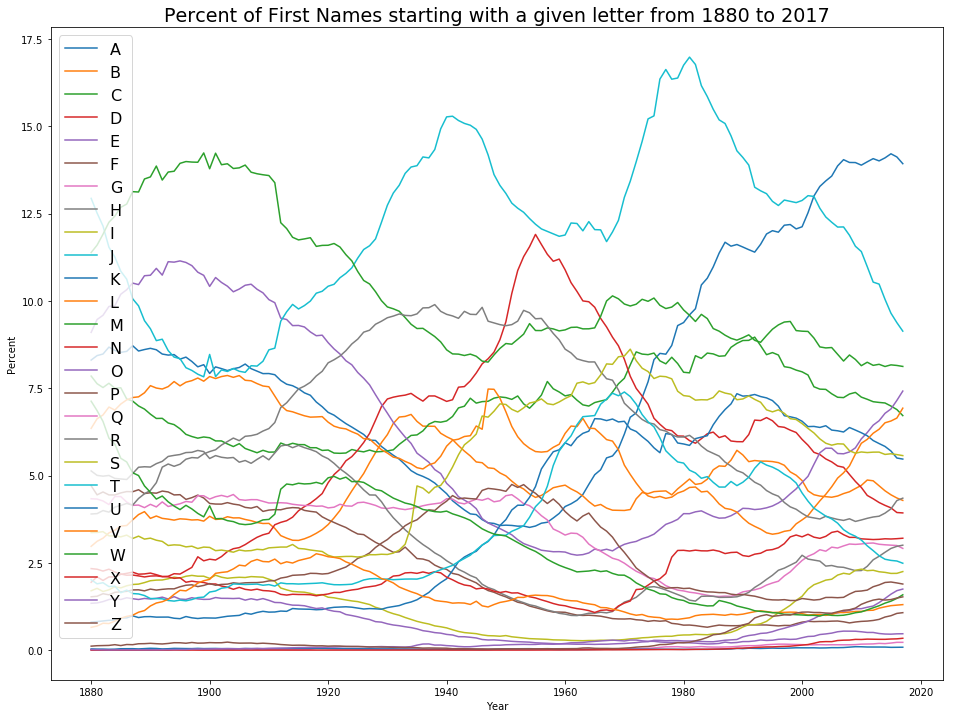

In [2]:
#for our first test lets see how the number of names starting with an a has changed over the years (by percent)


fig, ax = plt.subplots(figsize=(16,12))
plt.rcParams.update({'font.size': 16})

#loop through years to find answer
percentFirstLetter = []
firstLetter = []

letter = 0  #let A == 0 , Z == 25
while letter < 26:
    percentFirstLetter.append([])
    for index,y in enumerate(dataDict.get('Year')):
        tempCount = 0
        for j,name in enumerate(dataDict.get("Names")[index]):
            if name[0] == chr(letter+65) or name[0] == chr(letter+97):
                tempCount+=dataDict.get("Counts")[index][j]
        percentFirstLetter[letter].append(100*tempCount/sum(dataDict.get("Counts")[index]))
    firstLetter.append(chr(letter+65))
    
    ax.plot(dataDict.get('Year'),percentFirstLetter[letter], label='%s' % chr(letter+65))
    
    letter+=1
    

plt.title("Percent of First Names starting with a given letter from 1880 to 2017")
plt.xlabel("Year")
plt.ylabel("Percent")
plt.legend()
    

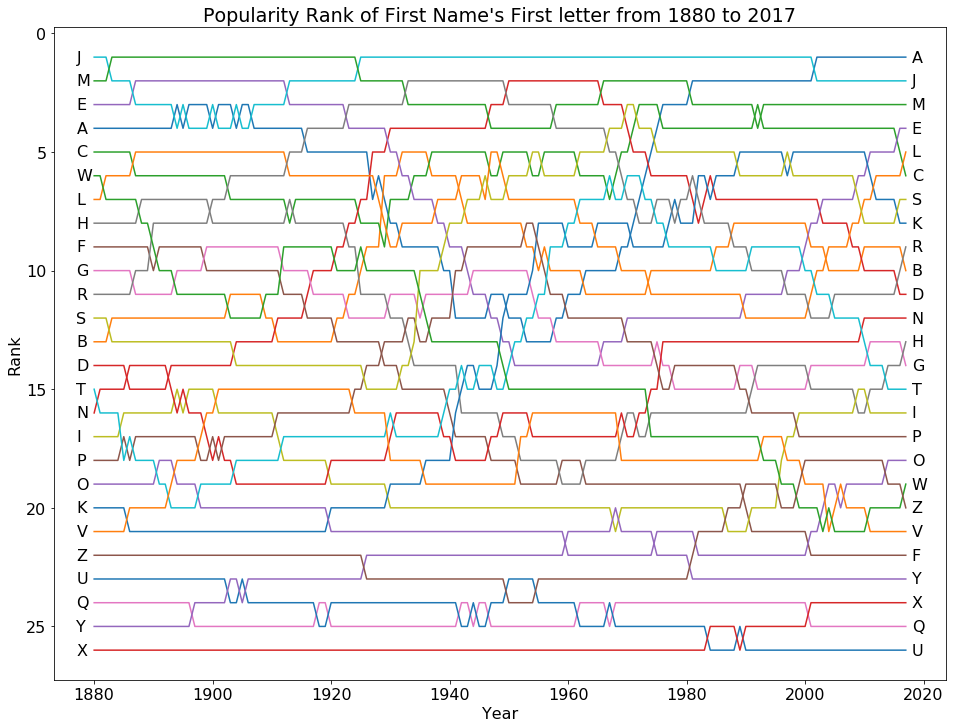

In [3]:
#So thats a mighty fine... but unreadable plot.  'D's spike in popularity in the 1960s is interesting, 
#as is 'K's sharp rise in recent years, over taking the previous winner, T/J?

#Lets make a plot that simply ranks the letters from most popular to least though, because that 
#will be easier to understand, and it will be a different angel to look at this from.
alphabet = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']


fig, ax = plt.subplots(figsize=(16,12))
plt.rcParams.update({'font.size': 16})

#we need to switch the column/row grouping in percentFirstLetter here
rotatedPercFirstLetter = list(zip(*percentFirstLetter))

sortedFirstLetter = []
for index,y in enumerate(dataDict.get('Year')):
    
    sortedPercFirstLetter, sortedFirstLetterTemp = (list(t) for t in zip(*sorted(zip(rotatedPercFirstLetter[index], firstLetter))))
    sortedFirstLetter.append(sortedFirstLetterTemp)

#So... now we need to make a 2d array, of years and letter with an int saved as a rank from 1-26

rankedFirstLetter = []
for letter in alphabet:
    rankedFirstLetter.append([])
    for index,y in enumerate(dataDict.get('Year')):
        tempRank = 0
        for j,let in enumerate(sortedFirstLetter[index]):
            if let == letter:
                tempRank = 26-j
        if tempRank == 0:
            print("Error")
        rankedFirstLetter[ord(letter)-65].append(tempRank)
    ax.plot(dataDict.get("Year"),rankedFirstLetter[ord(letter)-65],label=letter)
    plt.text(2018,rankedFirstLetter[ord(letter)-65][137]+0.2,letter)
    plt.text(1877,rankedFirstLetter[ord(letter)-65][0]+0.2,letter)
    

plt.gca().invert_yaxis() 


plt.title("Popularity Rank of First Name's First letter from 1880 to 2017")
plt.xlabel("Year")
plt.ylabel("Rank")

plt.show()
#This is sorted from least popular, to most popular
#print(rankedFirstLetter)



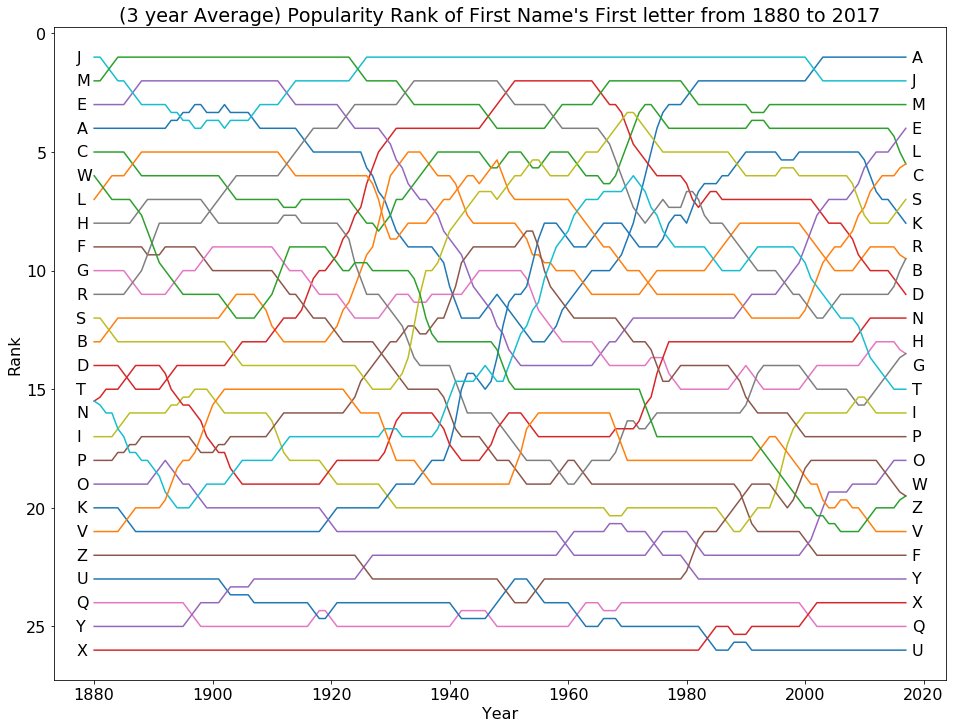

In [4]:
#Those rapid switches bettween ranks are hard to look at, so lets make the same plot but with smoothing, 
#so taking the average rank or the year before and after.


fig, ax = plt.subplots(figsize=(16,12))
plt.rcParams.update({'font.size': 16})

for letter in alphabet:
    letterInt = ord(letter)-65
    avgRankedFirstLetter = []
    for i,rank in enumerate(rankedFirstLetter[letterInt]):
        if i == 0:
            avgRankedFirstLetter.append((rank+rankedFirstLetter[letterInt][i+1])/2.0)
        elif i == 137:
            avgRankedFirstLetter.append((rank+rankedFirstLetter[letterInt][i-1])/2.0)
        else:
            avgRankedFirstLetter.append((rankedFirstLetter[letterInt][i-1]+rank+rankedFirstLetter[letterInt][i+1])/3.0)
    ax.plot(dataDict.get("Year"),avgRankedFirstLetter,label=letter)
    plt.text(2018,rankedFirstLetter[letterInt][137]+0.2,letter)
    plt.text(1877,rankedFirstLetter[letterInt][0]+0.2,letter)
    
plt.title("(3 year Average) Popularity Rank of First Name's First letter from 1880 to 2017")
plt.xlabel("Year")
plt.ylabel("Rank")
plt.gca().invert_yaxis() 
plt.show()

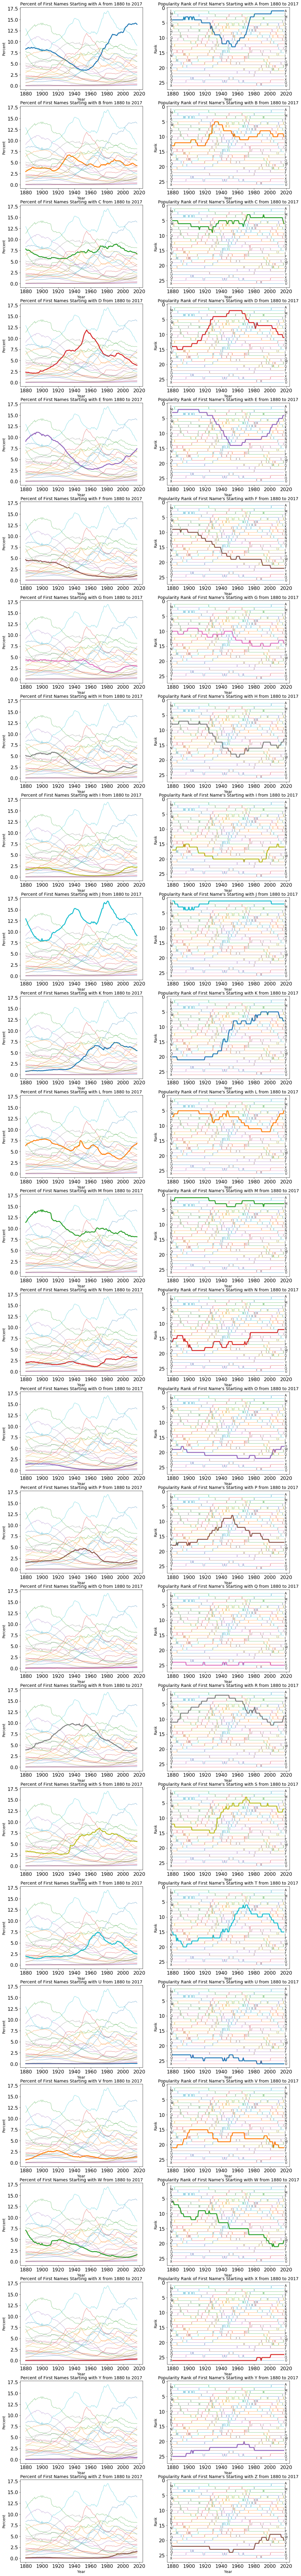

In [5]:
#Both of these are perhaps far too busy, so to help produce readable plots, lets create both of these plots with all colors 
#accept the line we care about with high alphas, and our line thinkened, for each letter.  So an extra 52 plots.  Which is a lot.

#because of the double loop structure of this, it takes a little bit to run.  

fig, axs = plt.subplots(nrows = 26,ncols = 2,figsize=(16,156))
for axI in axs: 
    axI[1].invert_yaxis()
plt.rcParams.update({'font.size': 10})    

alpha_ = 0.4                                                             #the alpha of the non-focal lines


#focalLetter = 'A'
i=0
for focalLetter in alphabet:
 
    axs[i][0].set_title('Percent of First Names Starting with ' + focalLetter + ' from 1880 to 2017', size = 14)
    axs[i][0].set_xlabel("Year", size = 12)
    axs[i][0].set_ylabel("Percent", size = 12)
    axs[i][1].set_title("Popularity Rank of First Name's Starting with "+ focalLetter +" from 1880 to 2017", size = 14)
    axs[i][1].set_xlabel("Year", size = 12)
    axs[i][1].set_ylabel("Rank", size = 12)

    for letter in alphabet:
        if letter == focalLetter:
            axs[i][0].plot(dataDict.get('Year'),percentFirstLetter[ord(letter)-65], label=letter, linewidth = 3)

            axs[i][1].plot(dataDict.get("Year"),rankedFirstLetter[ord(letter)-65],label=letter,linewidth = 3)
            axs[i][1].text(2018,rankedFirstLetter[ord(letter)-65][137]+0.3,letter, size=10)
            axs[i][1].text(1877,rankedFirstLetter[ord(letter)-65][0]+0.3,letter, size=10)
        else:
            axs[i][0].plot(dataDict.get('Year'),percentFirstLetter[ord(letter)-65], label=letter, alpha = alpha_)
            
            axs[i][1].plot(dataDict.get("Year"),rankedFirstLetter[ord(letter)-65],label=letter, alpha = alpha_)
            axs[i][1].text(2018,rankedFirstLetter[ord(letter)-65][137]+0.3,letter, size=10)
            axs[i][1].text(1877,rankedFirstLetter[ord(letter)-65][0]+0.3,letter, size=10)
    i+=1
plt.show()
    

In [ ]:
#I may come back and make a animated bargraph of the percentages in the future, that would go here.  
#But for now lets move on to a different aspect of our data.

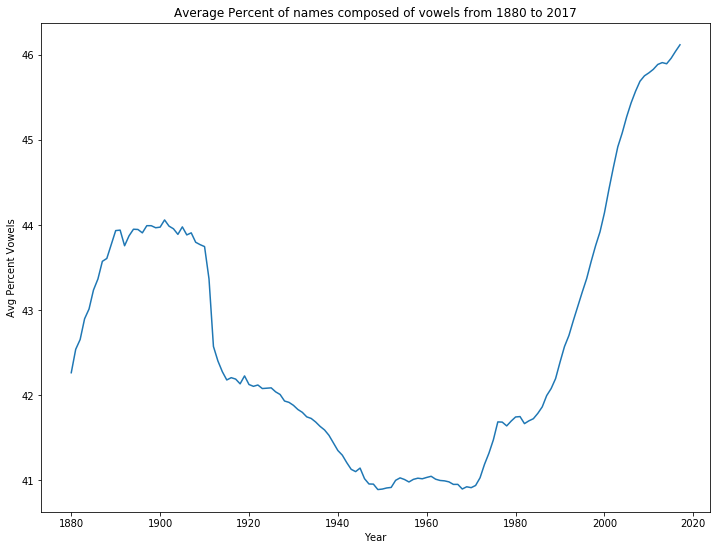

In [6]:
#We want to look at what fraction of names are vowels verses concenents, and see if it has changed over the years.
#first lets make libraries for the two catagories.  We will leave Y in both for now?


fig, ax = plt.subplots(figsize=(12,9))

conconants = ['B','C','D','F','G','H','J','K','L','M','N','P','Q','R','S','T','V','W','X','Y','Z']
vowels = ['A','E','I','O','U','Y']

avgPercentVowels = []
for index,y in enumerate(dataDict.get('Year')):
    tempCountVs = 0
    tempCountCs = 0
    tempCountLetters = 0
    for j,name in enumerate(dataDict.get("Names")[index]):
        nameWeight = dataDict.get("Counts")[index][j]
        for letter in name:
            if letter.upper() in vowels: tempCountVs+=nameWeight
            if letter.upper() in conconants: tempCountCs+=nameWeight
            tempCountLetters+=nameWeight
    avgPercentVowels.append(100*tempCountVs/tempCountLetters)

ax.plot(dataDict.get('Year'),avgPercentVowels)
plt.title("Average Percent of names composed of vowels from 1880 to 2017")
plt.xlabel("Year")
plt.ylabel("Avg Percent Vowels")
plt.show()



In [ ]:
#I wanted to make this plot, because I had thought that more recent nameing trends had been leaning towards softer sounds.  
#So if that were true I expected to see on average, more vowels in names.  There actually is a pretty sharp rise in the % of
#vowels in names throughout the ninties. So maybe my hypothsis was actually right? Though its worth noting that if I plotted
#this data with the y-axis between 0 and 100, the increase would look much less interesting.

In [2]:
#Lets make a function that will plot the percentage of names with a given "sound" (letter combination) as a function of year

def namesWithSound(sound):
    percentWith = []
    for index,y in enumerate(dataDict.get('Year')):
        countWith = 0
        countAll = 0
        for j,name in enumerate(dataDict.get("Names")[index]):
            nameWeight = dataDict.get("Counts")[index][j]
            if sound.lower() in name.lower():
                countWith+=nameWeight
            countAll+=nameWeight
        percentWith.append(100*countWith/countAll)
    
    plt.title("Percent of names containing " + sound + " from 1880 to 2017")
    plt.xlabel("Year")
    plt.ylabel("Percent With " + sound)
    plt.plot(dataDict.get('Year'),percentWith)
        
        
    

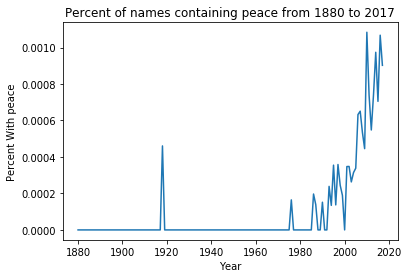

In [8]:
#Post War Name spikes?
namesWithSound("peace")

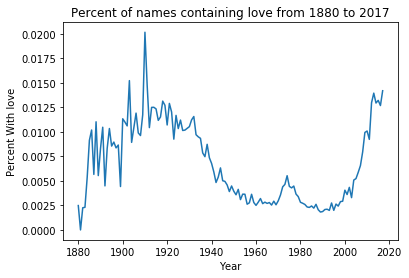

In [9]:
#Post War Name spikes part2:
namesWithSound("love")

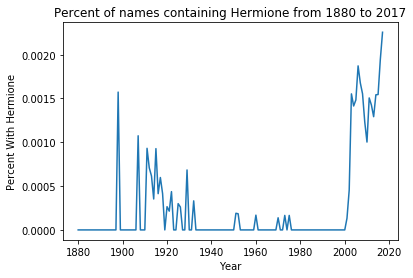

In [10]:
#Pop culture impacts?
namesWithSound("Hermione")
#Turns out Hermione was not... never used in the early 1900s, but the consistancy was only reached after the 
#Release of Harry Potter

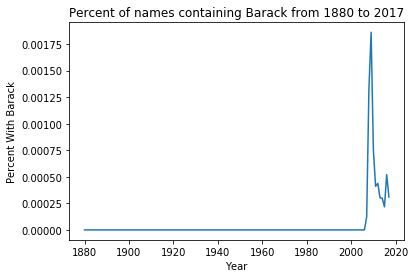

In [11]:
#Presedentual Influence. 
namesWithSound("Barack")

In [ ]:
#I curse the popularity of my name... 
namesWithSound("Jacob")
#And that percentage includes women, so its more like 1/50 men born in ~2000 named Jacob.  

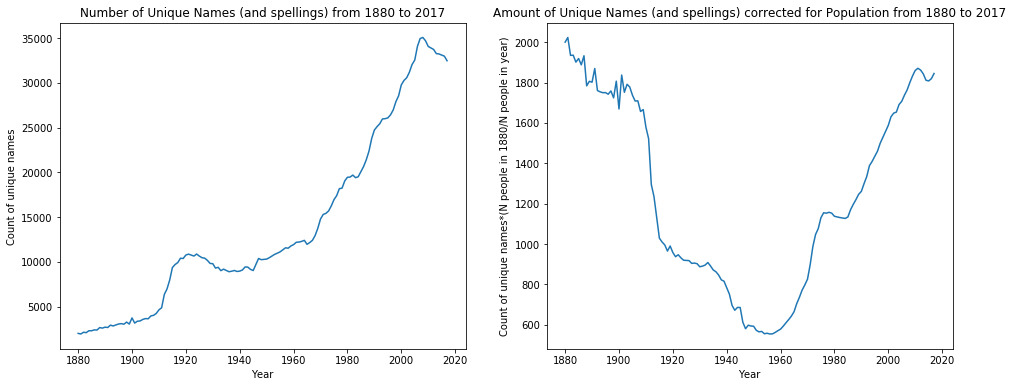

In [12]:
#How has the number of unique names changed with time (I bet it has gone way up)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
numNames = []
numPeople = []
correctedNumNames = []

for index,y in enumerate(dataDict.get('Year')):
    numNames.append(len(dataDict.get('Names')[index]))
    numPeople.append(sum(dataDict.get('Counts')[index]))
    correctedNumNames.append(numPeople[0]*numNames[index]/numPeople[index])
    
ax[0].set_title("Number of Unique Names (and spellings) from 1880 to 2017")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Count of unique names")
ax[0].plot(dataDict.get('Year'),numNames)

ax[1].set_title("Amount of Unique Names (and spellings) corrected for Population from 1880 to 2017")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Count of unique names*(N people in 1880/N people in year)")
ax[1].plot(dataDict.get('Year'),correctedNumNames)
plt.show()

In [ ]:
#The first graph is just the number of unique names
#The second plot is like, if each year had the same number of babies born as 1880, how many unique names would there be.

#I would not have guessed that naming was more creative (per person) in the 1880s than now, but I guess it makes sense.  There 
#were so many fewer people, after all.

In [ ]:
namesWithSound("Shannon")

In [13]:
#I want to be able to ask for the name which has had the largest rise or drop in popularity over a given range of time.  
#
# Usage: pass ints between 1880 and 2017 for the start and end year
#        pass 'M' or 'F' for gender
#        pass 1 or -1 for the direction (default is positive)
#        population Correction is a flag, default is true (1) which means the growth of decline 
#        in popularity is corrected for population growth.

def largestChange(startYear, endYear, gender, direction = None, populationCorrection = None):
    
    if not direction: direction = 1
    if not populationCorrection: populationCorrection = 1
    
    nameFirst = ''
    nameSecond = ''
    nameThird = ''
    changeFirst = 0
    changeSecond = 0
    changeThird = 0
    startYearI = startYear-1880
    endYearI = endYear-1880
    popCorrect = 1
    if populationCorrection == 1:
        popCorrect = sum(dataDict.get('Counts')[startYearI])/sum(dataDict.get('Counts')[endYearI])
    #print(popCorrect)
    #print(gender)
    
    if startYear < 1880 or endYear > 2017 or startYear >= endYear:
        print("Invalid Date Range, please enter years between 1880 and 2017")
        return
    if gender is not 'M' and gender is not 'F':
        print("Invalid gender, please enter 'M' or 'F'.")
        return
    if direction is not 1 and direction is not -1:
        print("Invalid direction, please enter 1 for largest growth in popularity, or -1 for largest decline.")
                         
    for i,name in enumerate(dataDict.get('Names')[startYearI]):
        change = 0
        if dataDict.get('Genders')[startYearI][i] == gender.upper():
            #Now we need to find the name in the end year.
            for j,name2 in enumerate(dataDict.get('Names')[endYearI]):
                if dataDict.get('Genders')[endYearI][j] == gender and name == name2:
                    change = dataDict.get('Counts')[endYearI][j]*popCorrect - dataDict.get('Counts')[startYearI][i]
                #elif direction is -1:
                #    change = -dataDict.get('Count')[startYearI][i]
                         
        if change*direction > changeFirst:
            changeThird = changeSecond
            changeSecond = changeFirst
            changeFirst = change*direction
            nameThird = nameSecond
            nameSecond = nameFirst
            nameFirst = name
        elif change*direction > changeSecond:
            changeThird = changeSecond
            changeSecond = change*direction
            nameThird = nameSecond
            nameSecond = name
        elif change*direction > changeThird:
            changeThird = change*direction
            nameThird = name
    
    if direction == 1:
        returnString = "The largest increases in a names popularity from "+str(startYear)+" to "+str(endYear)+" were: First: "+nameFirst+" Second: "+nameSecond+" Third: "+nameThird
    elif direction == -1:
        returnString = "The largest decreases in a names popularity from "+str(startYear)+" to "+str(endYear)+" were: First: "+nameFirst+" Second: "+nameSecond+" Third: "+nameThird
        
    return(returnString)
            

In [ ]:
largestChange(1988,1991,'M')

In [ ]:
namesWithSound("Tyler")

In [ ]:
namesWithSound("Jacob")

In [ ]:
namesWithSound("Cody")

In [ ]:
largestChange(1988,1991,'F')

In [ ]:
namesWithSound("Shelby")
#Theres got to be a reason for that. It is very sharp

In [ ]:
namesWithSound("Taylor")

In [ ]:
namesWithSound("Kelsey")

In [ ]:
largestChange(2000,2017,'M',-1)

In [ ]:
namesWithSound("Nicholas")

In [ ]:
namesWithSound("Joshua")

In [ ]:
largestChange(2000,2017,'M',)

In [ ]:
namesWithSound("Oliver")

In [14]:
print(largestChange(1880,1900,'M'))
print(largestChange(1880,1900,'M',-1))
print(largestChange(1880,1900,'F'))
print(largestChange(1880,1900,'F',-1))

The largest increases in a names popularity from 1880 to 1900 were: First: Willie Second: Harold Third: Raymond
The largest decreases in a names popularity from 1880 to 1900 were: First: William Second: John Third: Charles
The largest increases in a names popularity from 1880 to 1900 were: First: Helen Second: Ruth Third: Marie
The largest decreases in a names popularity from 1880 to 1900 were: First: Emma Second: Minnie Third: Ida


In [ ]:
print(largestChange(2015,2017,'M'))
print(largestChange(2015,2017,'F'))

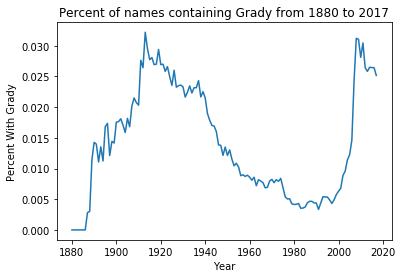

In [3]:
namesWithSound("Grady")

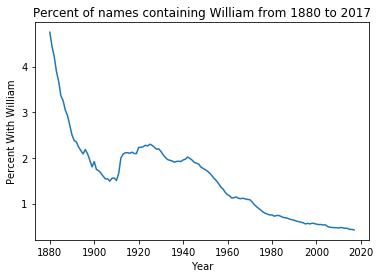

In [9]:
namesWithSound("Wil")